In [2]:
# Importando pandas
import pandas as pd

In [3]:
# Importando os dados
df = pd.read_csv("dados/microdados_censo_PE_2024.csv")

In [7]:
df.head()

,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,NO_REGIAO_GEOG_INTERM,CO_REGIAO_GEOG_INTERM,...,QT_TUR_BAS_D,QT_TUR_BAS_N,QT_TUR_BAS_EAD,QT_TUR_INF_INT,QT_TUR_INF_CRE_INT,QT_TUR_INF_PRE_INT,QT_TUR_FUND_INT,QT_TUR_FUND_AI_INT,QT_TUR_FUND_AF_INT,QT_TUR_MED_INT
0,2024,Nordeste,2,Pernambuco,PE,26,Abreu e Lima,2600054,Recife,2601,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024,Nordeste,2,Pernambuco,PE,26,Abreu e Lima,2600054,Recife,2601,...,18.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2024,Nordeste,2,Pernambuco,PE,26,Abreu e Lima,2600054,Recife,2601,...,12.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2024,Nordeste,2,Pernambuco,PE,26,Abreu e Lima,2600054,Recife,2601,...,15.0,9.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0
4,2024,Nordeste,2,Pernambuco,PE,26,Abreu e Lima,2600054,Recife,2601,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.tail()

,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,NO_REGIAO_GEOG_INTERM,CO_REGIAO_GEOG_INTERM,...,QT_TUR_BAS_D,QT_TUR_BAS_N,QT_TUR_BAS_EAD,QT_TUR_INF_INT,QT_TUR_INF_CRE_INT,QT_TUR_INF_PRE_INT,QT_TUR_FUND_INT,QT_TUR_FUND_AI_INT,QT_TUR_FUND_AF_INT,QT_TUR_MED_INT
9931,2024,Nordeste,2,Pernambuco,PE,26,Xexéu,2616506,Recife,2601,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9932,2024,Nordeste,2,Pernambuco,PE,26,Xexéu,2616506,Recife,2601,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9933,2024,Nordeste,2,Pernambuco,PE,26,Xexéu,2616506,Recife,2601,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9934,2024,Nordeste,2,Pernambuco,PE,26,Xexéu,2616506,Recife,2601,...,11.0,4.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0
9935,2024,Nordeste,2,Pernambuco,PE,26,Xexéu,2616506,Recife,2601,...,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9936 entries, 0 to 9935
Columns: 426 entries, NU_ANO_CENSO to QT_TUR_MED_INT
dtypes: float64(396), int64(14), object(16)
memory usage: 32.3+ MB


In [21]:
df.isnull().sum()

NU_ANO_CENSO             0
NO_REGIAO                0
CO_REGIAO                0
NO_UF                    0
SG_UF                    0
                      ... 
QT_TUR_INF_PRE_INT    1943
QT_TUR_FUND_INT       1943
QT_TUR_FUND_AI_INT    1943
QT_TUR_FUND_AF_INT    1943
QT_TUR_MED_INT        1943
Length: 426, dtype: int64

In [30]:
# Se você quiser substituir por 0 somente em colunas numéricas, e deixar outras colunas (como object, string, datetime, etc.) intactas.
df[df.select_dtypes(include='number').columns] = df.select_dtypes(include='number').fillna(0)

___

## TRATANDO OS DADOS NULOS

In [4]:
df.fillna(0, inplace=True)

In [152]:
df.isnull().sum()

NU_ANO_CENSO          0
NO_REGIAO             0
CO_REGIAO             0
NO_UF                 0
SG_UF                 0
                     ..
QT_TUR_INF_PRE_INT    0
QT_TUR_FUND_INT       0
QT_TUR_FUND_AI_INT    0
QT_TUR_FUND_AF_INT    0
QT_TUR_MED_INT        0
Length: 426, dtype: int64

___

### FILTRANDO O DATAFRAME

Ao analisar melhor o dicionário de dados, percebi que existia uma coluna que apresentava a situação de funcionamento da escola (_TP_SITUACAO_FUNCIONAMENTO_). Nele, os valores preenchidos eram:

- 1 - Em Atividade
- 2 - Paralisada
- 3 - Extinta (ano do Censo)
- 4 - Extinta em Anos Anteriores

Pensando nisso, irei filtrar o _df_ para que ele colete os dados apenas das escolas com opção 1 - ou seja, aquelas em atividade.

Assim, elas não irão distorcer os resultados futuramente, e também, não faz sentido analisar os dados de uma escola paralisada ou sem funcionar (Extinta)

In [5]:
df = df[df['TP_SITUACAO_FUNCIONAMENTO'] == 1]

___

### Algumas perguntas para a análise:
- Quais escolas tem biblioteca, quadra, banheiros, area verde (ou uma área de lazer)?
- Quais escolas tem laboratórios (de química, de informática, etc)?
- Quais os meios mais comuns de água nas escolas?
- E para energia?

___

In [6]:
# Contagem de dependencia administrativas das escolas (Se são públicas ou privadas)
df['TP_DEPENDENCIA'].value_counts()

TP_DEPENDENCIA
3    4755
4    2171
2    1061
1      26
Name: count, dtype: int64

**Diferença entre as escolas:**

- A escola municipal faz parte do município, e é ele quem deve responder por ela;
- Já a escola estadual é dever do próprio Estado cuidar dela, com investimento nas refeições, estruturas físicas, concurso para professores, etc.
- Por sua vez, uma escola federal é de responsabilidade do país, por isso vemos os "Institutos Federais de Educação" os IFs.
- E por fim, as escolas privadas não recebem dinheiro público, mas sim dos donos da escola, da mensalidade dos alunos, etc.

1 - Federal | 2 - Estadual | 3 - Municipal | 4 - Privada

In [7]:
df_copy = df.copy()

df_copy['CATEGORIA_ESCOLA'] = df_copy['TP_DEPENDENCIA'].map({
    1: 'Federal',
    2: 'Estadual',
    3: 'Municipal',
    4: 'Privada'
})

In [36]:
df_copy

,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,NO_REGIAO_GEOG_INTERM,CO_REGIAO_GEOG_INTERM,...,QT_TUR_BAS_N,QT_TUR_BAS_EAD,QT_TUR_INF_INT,QT_TUR_INF_CRE_INT,QT_TUR_INF_PRE_INT,QT_TUR_FUND_INT,QT_TUR_FUND_AI_INT,QT_TUR_FUND_AF_INT,QT_TUR_MED_INT,CATEGORIA_ESCOLA
1,2024,Nordeste,2,Pernambuco,PE,26,Abreu e Lima,2600054,Recife,2601,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Municipal
2,2024,Nordeste,2,Pernambuco,PE,26,Abreu e Lima,2600054,Recife,2601,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Municipal
3,2024,Nordeste,2,Pernambuco,PE,26,Abreu e Lima,2600054,Recife,2601,...,9.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,Estadual
5,2024,Nordeste,2,Pernambuco,PE,26,Abreu e Lima,2600054,Recife,2601,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Estadual
7,2024,Nordeste,2,Pernambuco,PE,26,Abreu e Lima,2600054,Recife,2601,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Municipal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9930,2024,Nordeste,2,Pernambuco,PE,26,Xexéu,2616506,Recife,2601,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Municipal
9931,2024,Nordeste,2,Pernambuco,PE,26,Xexéu,2616506,Recife,2601,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Municipal
9933,2024,Nordeste,2,Pernambuco,PE,26,Xexéu,2616506,Recife,2601,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Municipal
9934,2024,Nordeste,2,Pernambuco,PE,26,Xexéu,2616506,Recife,2601,...,4.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,Municipal


In [8]:
df_publicas = df_copy[df_copy['CATEGORIA_ESCOLA'].isin(['Federal', 'Estadual', 'Municipal'])]
df_privadas = df_copy[df_copy['CATEGORIA_ESCOLA'] == 'Privada']

In [38]:
df_publicas

,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,NO_REGIAO_GEOG_INTERM,CO_REGIAO_GEOG_INTERM,...,QT_TUR_BAS_N,QT_TUR_BAS_EAD,QT_TUR_INF_INT,QT_TUR_INF_CRE_INT,QT_TUR_INF_PRE_INT,QT_TUR_FUND_INT,QT_TUR_FUND_AI_INT,QT_TUR_FUND_AF_INT,QT_TUR_MED_INT,CATEGORIA_ESCOLA
1,2024,Nordeste,2,Pernambuco,PE,26,Abreu e Lima,2600054,Recife,2601,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Municipal
2,2024,Nordeste,2,Pernambuco,PE,26,Abreu e Lima,2600054,Recife,2601,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Municipal
3,2024,Nordeste,2,Pernambuco,PE,26,Abreu e Lima,2600054,Recife,2601,...,9.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,Estadual
5,2024,Nordeste,2,Pernambuco,PE,26,Abreu e Lima,2600054,Recife,2601,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Estadual
7,2024,Nordeste,2,Pernambuco,PE,26,Abreu e Lima,2600054,Recife,2601,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Municipal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9930,2024,Nordeste,2,Pernambuco,PE,26,Xexéu,2616506,Recife,2601,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Municipal
9931,2024,Nordeste,2,Pernambuco,PE,26,Xexéu,2616506,Recife,2601,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Municipal
9933,2024,Nordeste,2,Pernambuco,PE,26,Xexéu,2616506,Recife,2601,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Municipal
9934,2024,Nordeste,2,Pernambuco,PE,26,Xexéu,2616506,Recife,2601,...,4.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,Municipal


In [20]:
# df_privadas['TP_LOCALIZACAO'].value_counts()
df_privadas

,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,NO_REGIAO_GEOG_INTERM,CO_REGIAO_GEOG_INTERM,...,QT_TUR_BAS_N,QT_TUR_BAS_EAD,QT_TUR_INF_INT,QT_TUR_INF_CRE_INT,QT_TUR_INF_PRE_INT,QT_TUR_FUND_INT,QT_TUR_FUND_AI_INT,QT_TUR_FUND_AF_INT,QT_TUR_MED_INT,CATEGORIA_ESCOLA
14,2024,Nordeste,2,Pernambuco,PE,26,Abreu e Lima,2600054,Recife,2601,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Privada
21,2024,Nordeste,2,Pernambuco,PE,26,Abreu e Lima,2600054,Recife,2601,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Privada
33,2024,Nordeste,2,Pernambuco,PE,26,Abreu e Lima,2600054,Recife,2601,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Privada
37,2024,Nordeste,2,Pernambuco,PE,26,Abreu e Lima,2600054,Recife,2601,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Privada
50,2024,Nordeste,2,Pernambuco,PE,26,Abreu e Lima,2600054,Recife,2601,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Privada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9902,2024,Nordeste,2,Pernambuco,PE,26,Vitória de Santo Antão,2616407,Recife,2601,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,3.0,Privada
9903,2024,Nordeste,2,Pernambuco,PE,26,Vitória de Santo Antão,2616407,Recife,2601,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Privada
9907,2024,Nordeste,2,Pernambuco,PE,26,Vitória de Santo Antão,2616407,Recife,2601,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Privada
9908,2024,Nordeste,2,Pernambuco,PE,26,Vitória de Santo Antão,2616407,Recife,2601,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Privada


In [40]:
# Exportando o dataframe das escolas PUBLICAS para excel:
df_privadas.to_excel('censo_pe_privadas.xlsx')

In [41]:
# Exportando o dataframe das escolas PUBLICAS para excel:
df_publicas.to_excel('censo_pe_publicas.xlsx')

## Estrutura das escolas

### Quais escolas tem bibliotecas (e/ ou sala de leituras)?

### Em escolas públicas (Federais, Municipais e Estaduais)

In [46]:
df_publicas['IN_BIBLIOTECA'].value_counts()

IN_BIBLIOTECA
0.0    3574
1.0    2268
Name: count, dtype: int64

In [47]:
df_publicas['IN_BIBLIOTECA_SALA_LEITURA'].value_counts()

IN_BIBLIOTECA_SALA_LEITURA
1.0    3035
0.0    2807
Name: count, dtype: int64

In [9]:
# escolas_com_biblioteca = df[df['IN_BIBLIOTECA'] == 1]

df_bibli_pub = df_publicas[
    (df_publicas['IN_BIBLIOTECA'] == 1) &
    (df_publicas['IN_BIBLIOTECA_SALA_LEITURA'] == 1)
]

df_resumo_bibli_pub = df_bibli_pub.groupby('NO_MUNICIPIO')['IN_BIBLIOTECA'].count()
df_resumo_bibli_pub = df_resumo_bibli_pub.sort_values(ascending=False)

Nesse caso acima do dataframe, ele apenas pegou as escolas publicas que tinham __biblioteca__ e também tinham __sala de leitura__.

Ou seja, no total foram 2268 escolas que tinham essas duas estruturas. 767 escolas ficaram fora da análise, por não terem bibliotecas e salas de leituras.

In [50]:
df_resumo_bibli_pub.sum()

np.int64(2268)

In [51]:
df_resumo_bibli_pub.head() # Municipios com maior numero de escolas com bibliotecas

NO_MUNICIPIO
Recife                     332
Jaboatão dos Guararapes    105
Caruaru                     79
Petrolina                   58
Olinda                      56
Name: IN_BIBLIOTECA, dtype: int64

In [52]:
df_resumo_bibli_pub.tail() # Municipios com menor numeros de escolas com bibliotecas

NO_MUNICIPIO
Salgadinho    1
Solidão       1
Sanharó       1
Terra Nova    1
Terezinha     1
Name: IN_BIBLIOTECA, dtype: int64

### Em escolas privadas

In [53]:
df_privadas['IN_BIBLIOTECA'].value_counts()

IN_BIBLIOTECA
1.0    1530
0.0     641
Name: count, dtype: int64

Total das escolas: 2171

In [10]:
df_bibli_priv = df_privadas[
    (df_privadas['IN_BIBLIOTECA'] == 1) &
    (df_privadas['IN_BIBLIOTECA_SALA_LEITURA'] == 1)
]

df_resumo_bibli_priv = df_bibli_priv.groupby('NO_MUNICIPIO')['IN_BIBLIOTECA'].count()
df_resumo_bibli_priv = df_resumo_bibli_priv.sort_values(ascending=False)

In [55]:
df_resumo_bibli_priv.sum()

np.int64(1530)

In [56]:
df_resumo_bibli_priv.head()

NO_MUNICIPIO
Recife                     364
Jaboatão dos Guararapes    133
Olinda                     114
Paulista                    74
Caruaru                     68
Name: IN_BIBLIOTECA, dtype: int64

___

In [11]:
# Dando um merge nos dois dataframes

df_bibliotecas = pd.merge(
    df_resumo_bibli_priv,
    df_resumo_bibli_pub,
    on='NO_MUNICIPIO',
    how='outer'  # garante que todos os municípios apareçam, mesmo que só tenham públicas ou privadas
)

df_bibliotecas.reset_index(inplace=True) # Cria uma nova coluna de indice e a antiga ('NO_MUNICIPIO') se torna uma coluna normal

df_bibliotecas.fillna(0, inplace=True)  # Se tiver NaN (ou seja, um município que só tem pública ou privada), preenche com 0

# Renomeando o nome das colunas
df_bibliotecas.rename(columns={
    'NO_MUNICIPIO': 'Municipio',
    'IN_BIBLIOTECA_y': 'Publicas_com_Biblioteca',
    'IN_BIBLIOTECA_x': 'Privadas_com_Biblioteca'
}, inplace=True)

# Convertendo as colunas de totais das bibliotecas para inteiros
df_bibliotecas[['Publicas_com_Biblioteca', 'Privadas_com_Biblioteca']] = df_bibliotecas[
    ['Publicas_com_Biblioteca', 'Privadas_com_Biblioteca']
].astype(int)  # Converte para inteiro

In [12]:
df_bibliotecas.sort_values(by='Privadas_com_Biblioteca', ascending=False)

,Municipio,Privadas_com_Biblioteca,Publicas_com_Biblioteca
130,Recife,364,332
85,Jaboatão dos Guararapes,133,105
109,Olinda,114,56
120,Paulista,74,55
42,Caruaru,68,79
...,...,...,...
174,Tupanatinga,0,3
175,Tuparetama,0,7
178,Vertente do Lério,0,6
177,Verdejante,0,3


In [13]:
df_bibliotecas['Total_Escolas'] = df_bibliotecas['Privadas_com_Biblioteca'] + df_bibliotecas['Publicas_com_Biblioteca']

In [84]:
# Exportando dataframe para excel (xlsx)
df_bibliotecas.to_excel('dados_bibliotecas.xlsx')

In [17]:
df_bibliotecas.sort_values(by='Privadas_com_Biblioteca', ascending=False)

,Municipio,Privadas_com_Biblioteca,Publicas_com_Biblioteca,Total_Escolas
130,Recife,364,332,696
85,Jaboatão dos Guararapes,133,105,238
109,Olinda,114,56,170
120,Paulista,74,55,129
42,Caruaru,68,79,147
...,...,...,...,...
174,Tupanatinga,0,3,3
175,Tuparetama,0,7,7
178,Vertente do Lério,0,6,6
177,Verdejante,0,3,3


___

In [31]:
# Quantas escolas que são privadas e são da zona rural existem?
df_privadas[
    (df_privadas['TP_LOCALIZACAO'] == 2) &  # 2 = zona rural
    (df_privadas['IN_BIBLIOTECA'] == 1)     # tem biblioteca
].groupby('NO_MUNICIPIO').size().reset_index(name='QTDE_ESCOLAS')

,NO_MUNICIPIO,QTDE_ESCOLAS
0,Belém do São Francisco,1
1,Cabo de Santo Agostinho,1
2,Camaragibe,1
3,Camocim de São Félix,1
4,Caruaru,2
5,Garanhuns,2
6,Goiana,1
7,Igarassu,1
8,Ipojuca,1
9,Itapissuma,1


In [34]:
# Quantas escolas que são privadas e são da zona urbana existem?
df_privadas[
    (df_privadas['TP_LOCALIZACAO'] == 1) &  # 1 Zona Urbana
    (df_privadas['IN_BIBLIOTECA'] == 1)     # tem biblioteca
].groupby('NO_MUNICIPIO').size().reset_index(name='QTDE_ESCOLAS').sort_values(by='QTDE_ESCOLAS', ascending=False)

,NO_MUNICIPIO,QTDE_ESCOLAS
103,Recife,364
66,Jaboatão dos Guararapes,132
85,Olinda,114
94,Paulista,74
31,Caruaru,66
...,...,...
117,Serrita,1
122,São Bento do Una,1
114,Santa Maria do Cambucá,1
140,Vertentes,1


___

In [36]:
# Quantas escolas que são PÚBLICAS e são da ZONA RURAL existem?
df_publicas[
    (df_publicas['TP_LOCALIZACAO'] == 2) &  # 2 = zona rural
    (df_publicas['IN_BIBLIOTECA'] == 1)     # tem biblioteca
].groupby('NO_MUNICIPIO').size().reset_index(name='QTDE_ESCOLAS').sort_values(by='QTDE_ESCOLAS', ascending=False)

,NO_MUNICIPIO,QTDE_ESCOLAS
35,Caruaru,20
32,Carnaubeira da Penha,19
23,Cabo de Santo Agostinho,16
94,Petrolina,16
90,Paudalho,13
...,...,...
109,Santa Terezinha,1
126,Tupanatinga,1
123,Tacaimbó,1
122,São Vicente Férrer,1


In [37]:
# Quantas escolas que são PÚBLICAS e são da ZONA URBANA existem?
df_publicas[
    (df_publicas['TP_LOCALIZACAO'] == 1) &  # 1 = zona Urbana
    (df_publicas['IN_BIBLIOTECA'] == 1)     # tem biblioteca
].groupby('NO_MUNICIPIO').size().reset_index(name='QTDE_ESCOLAS').sort_values(by='QTDE_ESCOLAS', ascending=False)

,NO_MUNICIPIO,QTDE_ESCOLAS
130,Recife,332
85,Jaboatão dos Guararapes,94
42,Caruaru,59
109,Olinda,54
120,Paulista,53
...,...,...
135,Salgadinho,1
150,Solidão,1
138,Sanharó,1
168,Terra Nova,1


___

### ESCOLAS COM BIBLIOTECAS E SEM

In [96]:
df_com_biblio = df[df['IN_BIBLIOTECA'] == 1] # COM
df_sem_biblio = df[df['IN_BIBLIOTECA'] == 0] # SEM

In [97]:
# Agrupar e contar por município (ou outra categoria)

resumo_com = df_com_biblio.groupby('NO_MUNICIPIO').size().rename('COM_BIBLIOTECA')
resumo_sem = df_sem_biblio.groupby('NO_MUNICIPIO').size().rename('SEM_BIBLIOTECA')


In [98]:
# Juntando os dois dataframes
df_resumo_bibli_2 = pd.concat([resumo_com, resumo_sem], axis=1).fillna(0).astype(int)

df_resumo_bibli_2['TOTAL'] = df_resumo_bibli_2['COM_BIBLIOTECA'] + df_resumo_bibli_2['SEM_BIBLIOTECA']

df_resumo_bibli_2 = df_resumo_bibli_2.sort_values('TOTAL', ascending=False)

In [99]:
df_resumo_bibli_2

,COM_BIBLIOTECA,SEM_BIBLIOTECA,TOTAL
NO_MUNICIPIO,,,
Recife,696,539,1235
Jaboatão dos Guararapes,238,276,514
Petrolina,108,271,379
Olinda,170,162,332
Caruaru,147,151,298
...,...,...,...
Ingazeira,1,9,10
Terra Nova,1,8,9
Granito,6,3,9


In [100]:
# Visualizar a proporção do dataframe
df_resumo_bibli_2['%_COM_BIBLIOTECA'] = (df_resumo_bibli_2['COM_BIBLIOTECA'] / df_resumo_bibli_2['TOTAL']) * 100
df_resumo_bibli_2['%_SEM_BIBLIOTECA'] = (df_resumo_bibli_2['SEM_BIBLIOTECA'] / df_resumo_bibli_2['TOTAL']) * 100


In [101]:
df_resumo_bibli_2

,COM_BIBLIOTECA,SEM_BIBLIOTECA,TOTAL,%_COM_BIBLIOTECA,%_SEM_BIBLIOTECA
NO_MUNICIPIO,,,,,
Recife,696,539,1235,56.356275,43.643725
Jaboatão dos Guararapes,238,276,514,46.303502,53.696498
Petrolina,108,271,379,28.496042,71.503958
Olinda,170,162,332,51.204819,48.795181
Caruaru,147,151,298,49.328859,50.671141
...,...,...,...,...,...
Ingazeira,1,9,10,10.000000,90.000000
Terra Nova,1,8,9,11.111111,88.888889
Granito,6,3,9,66.666667,33.333333


___

# Infraestrutura ligada ao esgoto das escolas

Algumas escolas tem mais de uma opção do tipo de esgoto. Devido a isso, fiz duas analises:

**1º: Mostra e apresenta a abordagem resumida (sem duplicidade)**

**2º: Apresente a realidade detalhada em separado**

In [39]:
colunas_esgoto = [
    'TP_LOCALIZACAO',
    'IN_ESGOTO_REDE_PUBLICA',
    'IN_ESGOTO_FOSSA_SEPTICA',
    'IN_ESGOTO_FOSSA_COMUM',
    'IN_ESGOTO_FOSSA',
    'IN_ESGOTO_INEXISTENTE'
]

### 1º Primeira Análise - ESCOLAS PUBLICAS

In [45]:
# Contar quantas escolas têm cada infraestrutura (valor == 1)
df_resumo_esgoto = df_publicas.groupby('NO_MUNICIPIO')[colunas_esgoto[1:]].sum()

# df_resumo_esgoto['TOTAL'] = df_resumo_esgoto[colunas_esgoto[1]] +  df_resumo_esgoto[colunas_esgoto[2]] + df_resumo_esgoto[colunas_esgoto[3]] + df_resumo_esgoto[colunas_esgoto[4]] + df_resumo_esgoto[colunas_esgoto[5]] 
# df_resumo_esgoto['TOTAL'] = df_resumo_esgoto[colunas_esgoto[1:]].sum(axis=1)

# Criando a coluna total de escolas:
df_total_escolas = df_publicas.groupby('NO_MUNICIPIO').size().rename('TOTAL_ESCOLAS')

# Juntando ao dataframe do resumo_esgoto
df_resumo_esgoto = df_resumo_esgoto.join(df_total_escolas)


df_resumo_esgoto = df_resumo_esgoto.sort_values('TOTAL_ESCOLAS', ascending=False)

In [46]:
df_resumo_esgoto.head()

,IN_ESGOTO_REDE_PUBLICA,IN_ESGOTO_FOSSA_SEPTICA,IN_ESGOTO_FOSSA_COMUM,IN_ESGOTO_FOSSA,IN_ESGOTO_INEXISTENTE,TOTAL_ESCOLAS
NO_MUNICIPIO,,,,,,
Recife,360.0,96.0,72.0,168.0,0.0,494
Petrolina,109.0,69.0,18.0,87.0,1.0,194
Jaboatão dos Guararapes,109.0,35.0,54.0,89.0,2.0,189
Caruaru,94.0,68.0,11.0,79.0,0.0,169
Olinda,95.0,12.0,15.0,27.0,2.0,119


___

### 1º Primeira Análise - ESCOLAS PRIVADAS

In [47]:
# Contar quantas escolas têm cada infraestrutura (valor == 1)
df_resumo_esgoto_priv = df_privadas.groupby('NO_MUNICIPIO')[colunas_esgoto[1:]].sum()

# Criando a coluna total de escolas:
df_total_escolas_priv = df_privadas.groupby('NO_MUNICIPIO').size().rename('TOTAL_ESCOLAS')

# Juntando ao dataframe do resumo_esgoto
df_resumo_esgoto_priv = df_resumo_esgoto_priv.join(df_total_escolas_priv)


df_resumo_esgoto_priv = df_resumo_esgoto_priv.sort_values('TOTAL_ESCOLAS', ascending=False)

In [55]:
df_resumo_esgoto_priv

,IN_ESGOTO_REDE_PUBLICA,IN_ESGOTO_FOSSA_SEPTICA,IN_ESGOTO_FOSSA_COMUM,IN_ESGOTO_FOSSA,IN_ESGOTO_INEXISTENTE,TOTAL_ESCOLAS
NO_MUNICIPIO,,,,,,
Recife,476.0,54.0,33.0,87.0,0.0,545
Jaboatão dos Guararapes,134.0,35.0,21.0,56.0,0.0,182
Petrolina,114.0,35.0,1.0,36.0,0.0,150
Olinda,116.0,8.0,8.0,16.0,2.0,130
Paulista,70.0,17.0,7.0,24.0,0.0,90
...,...,...,...,...,...,...
Poção,1.0,0.0,0.0,0.0,0.0,1
Parnamirim,1.0,0.0,0.0,0.0,0.0,1
Serrita,1.0,0.0,0.0,0.0,0.0,1


___

# Infraestrutura ligada ao abastecimento de energia elétrica nas escolas

In [60]:
colunas_energia = [
    'IN_ENERGIA_REDE_PUBLICA',
    'IN_ENERGIA_GERADOR_FOSSIL',
    'IN_ENERGIA_RENOVAVEL',
    'IN_ENERGIA_INEXISTENTE'
]

## ESCOLAS PRIVADAS

In [67]:
df_resumo_energia_priv = df_privadas.groupby('NO_MUNICIPIO')[colunas_energia].sum()

df_resumo_energia_priv['TOTAL_ESCOLAS'] = df_privadas.groupby('NO_MUNICIPIO').size()

for col in colunas_energia:
    df_resumo_energia_priv[f'%_{col}'] = (
        df_resumo_energia_priv[col] / df_resumo_energia_priv['TOTAL_ESCOLAS']
    ) * 100

In [69]:
df_resumo_energia_priv.head()

,IN_ENERGIA_REDE_PUBLICA,IN_ENERGIA_GERADOR_FOSSIL,IN_ENERGIA_RENOVAVEL,IN_ENERGIA_INEXISTENTE,TOTAL_ESCOLAS,%_IN_ENERGIA_REDE_PUBLICA,%_IN_ENERGIA_GERADOR_FOSSIL,%_IN_ENERGIA_RENOVAVEL,%_IN_ENERGIA_INEXISTENTE
NO_MUNICIPIO,,,,,,,,,
Abreu e Lima,23.0,0.0,3.0,0.0,24,95.833333,0.0,12.500000,0.0
Afogados da Ingazeira,3.0,0.0,1.0,0.0,3,100.000000,0.0,33.333333,0.0
Afrânio,1.0,0.0,0.0,0.0,1,100.000000,0.0,0.000000,0.0
Agrestina,6.0,0.0,0.0,0.0,6,100.000000,0.0,0.000000,0.0
Alagoinha,1.0,0.0,0.0,0.0,1,100.000000,0.0,0.000000,0.0


In [68]:
df_resumo_energia_priv['IN_ENERGIA_INEXISTENTE'].value_counts()

IN_ENERGIA_INEXISTENTE
0.0    158
Name: count, dtype: int64

## ESCOLAS PUBLICAS

In [110]:
df_resumo_energia_pub = df_publicas.groupby('NO_MUNICIPIO')[colunas_energia].sum()

df_resumo_energia_pub['TOTAL_ESCOLAS'] = df_publicas.groupby('NO_MUNICIPIO').size()

for col in colunas_energia:
    df_resumo_energia_pub[f'%_{col}'] = (
        df_resumo_energia_pub[col] / df_resumo_energia_pub['TOTAL_ESCOLAS']
    ) * 100

df_resumo_energia_pub = df_resumo_energia_pub.reset_index()

In [111]:
df_resumo_energia_pub.sort_values(by='IN_ENERGIA_REDE_PUBLICA', ascending=False)

,NO_MUNICIPIO,IN_ENERGIA_REDE_PUBLICA,IN_ENERGIA_GERADOR_FOSSIL,IN_ENERGIA_RENOVAVEL,IN_ENERGIA_INEXISTENTE,TOTAL_ESCOLAS,%_IN_ENERGIA_REDE_PUBLICA,%_IN_ENERGIA_GERADOR_FOSSIL,%_IN_ENERGIA_RENOVAVEL,%_IN_ENERGIA_INEXISTENTE
130,Recife,493.0,1.0,9.0,0.0,494,99.797571,0.202429,1.821862,0.0
123,Petrolina,194.0,0.0,2.0,0.0,194,100.000000,0.000000,1.030928,0.0
85,Jaboatão dos Guararapes,189.0,0.0,0.0,0.0,189,100.000000,0.000000,0.000000,0.0
42,Caruaru,169.0,0.0,0.0,0.0,169,100.000000,0.000000,0.000000,0.0
109,Olinda,119.0,0.0,0.0,0.0,119,100.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
59,Ferreiros,8.0,0.0,0.0,0.0,8,100.000000,0.000000,0.000000,0.0
67,Granito,8.0,0.0,0.0,0.0,8,100.000000,0.000000,0.000000,0.0
150,Solidão,6.0,0.0,0.0,0.0,6,100.000000,0.000000,0.000000,0.0
23,Brejinho,5.0,0.0,0.0,0.0,5,100.000000,0.000000,0.000000,0.0


In [112]:
df_resumo_energia_pub['IN_ENERGIA_GERADOR_FOSSIL'].value_counts()

IN_ENERGIA_GERADOR_FOSSIL
0.0    182
1.0      3
Name: count, dtype: int64

In [106]:
# Fazendo uma consulta especifica dentro do dataframe
df_publicas.loc[
    (df_publicas['IN_ENERGIA_GERADOR_FOSSIL'] == 1) & 
    (df_publicas['NO_MUNICIPIO'] == 'Recife'),
    ['NO_MUNICIPIO', 'NO_ENTIDADE', 'TP_CATEGORIA_ESCOLA_PRIVADA', 'TP_LOCALIZACAO', 'DS_ENDERECO' ,'NO_BAIRRO', 'IN_ENERGIA_REDE_PUBLICA', 'IN_ENERGIA_GERADOR_FOSSIL', 'IN_ENERGIA_RENOVAVEL']
]
# Aqui, loc[condição_linhas, lista_colunas].

,NO_MUNICIPIO,NO_ENTIDADE,TP_CATEGORIA_ESCOLA_PRIVADA,TP_LOCALIZACAO,DS_ENDERECO,NO_BAIRRO,IN_ENERGIA_REDE_PUBLICA,IN_ENERGIA_GERADOR_FOSSIL,IN_ENERGIA_RENOVAVEL
7383,Recife,ESCOLA MUNICIPAL ANTONIO HERACLIO DO REGO,0.0,1,RUA MANOEL SILVA,AGUA FRIA,1.0,1.0,1.0


In [105]:
# Escolas que tem todos os tipos de fornecimento de energia
df_publicas.loc[
    (df_publicas['IN_ENERGIA_REDE_PUBLICA'] == 1) & 
    (df_publicas['IN_ENERGIA_GERADOR_FOSSIL'] == 1) &
    (df_publicas['IN_ENERGIA_RENOVAVEL'] == 1),
    ['NO_MUNICIPIO', 'NO_ENTIDADE', 'TP_CATEGORIA_ESCOLA_PRIVADA', 'TP_LOCALIZACAO', 'DS_ENDERECO' ,'NO_BAIRRO', 'IN_ENERGIA_REDE_PUBLICA', 'IN_ENERGIA_GERADOR_FOSSIL', 'IN_ENERGIA_RENOVAVEL']
]

,NO_MUNICIPIO,NO_ENTIDADE,TP_CATEGORIA_ESCOLA_PRIVADA,TP_LOCALIZACAO,DS_ENDERECO,NO_BAIRRO,IN_ENERGIA_REDE_PUBLICA,IN_ENERGIA_GERADOR_FOSSIL,IN_ENERGIA_RENOVAVEL
7383,Recife,ESCOLA MUNICIPAL ANTONIO HERACLIO DO REGO,0.0,1,RUA MANOEL SILVA,AGUA FRIA,1.0,1.0,1.0


In [104]:
# Escolas que tem apenas o fornecimento de energia do tipo 'Gerador Fossil':
df_publicas.loc[
    (df_publicas['IN_ENERGIA_GERADOR_FOSSIL'] == 1),
    ['NO_MUNICIPIO', 'NO_ENTIDADE', 'TP_CATEGORIA_ESCOLA_PRIVADA', 'TP_LOCALIZACAO', 'DS_ENDERECO' ,'NO_BAIRRO', 'IN_ENERGIA_REDE_PUBLICA', 'IN_ENERGIA_GERADOR_FOSSIL', 'IN_ENERGIA_RENOVAVEL']
]

,NO_MUNICIPIO,NO_ENTIDADE,TP_CATEGORIA_ESCOLA_PRIVADA,TP_LOCALIZACAO,DS_ENDERECO,NO_BAIRRO,IN_ENERGIA_REDE_PUBLICA,IN_ENERGIA_GERADOR_FOSSIL,IN_ENERGIA_RENOVAVEL
691,Belo Jardim,IFPE - CAMPUS BELO JARDIM,0.0,1,RUA SEBASTIAO RODRIGUES DA COSTA,SAO PEDRO,1.0,1.0,0.0
3474,Igarassu,CENTRO DE EDUCACAO INTEGRAL FERNANDO HENRIQUE ...,0.0,1,RUA JOAO PAULO II,SANTA RITA,1.0,1.0,0.0
7383,Recife,ESCOLA MUNICIPAL ANTONIO HERACLIO DO REGO,0.0,1,RUA MANOEL SILVA,AGUA FRIA,1.0,1.0,1.0


In [107]:
# Escolas PRIVADAS que tem todos os tipos de fornecimento de energia
df_privadas.loc[
    (df_privadas['IN_ENERGIA_REDE_PUBLICA'] == 1) & 
    (df_privadas['IN_ENERGIA_GERADOR_FOSSIL'] == 1) &
    (df_privadas['IN_ENERGIA_RENOVAVEL'] == 1),
    ['NO_MUNICIPIO', 'NO_ENTIDADE', 'TP_CATEGORIA_ESCOLA_PRIVADA', 'TP_LOCALIZACAO', 'DS_ENDERECO' ,'NO_BAIRRO', 'IN_ENERGIA_REDE_PUBLICA', 'IN_ENERGIA_GERADOR_FOSSIL', 'IN_ENERGIA_RENOVAVEL']
]

,NO_MUNICIPIO,NO_ENTIDADE,TP_CATEGORIA_ESCOLA_PRIVADA,TP_LOCALIZACAO,DS_ENDERECO,NO_BAIRRO,IN_ENERGIA_REDE_PUBLICA,IN_ENERGIA_GERADOR_FOSSIL,IN_ENERGIA_RENOVAVEL
6048,Paulista,ESCOLA PAROQUIAL NOSSA SENHORA DE FATIMA,3.0,1,RUA HENRIQUE DIAS,PARATIBE,1.0,1.0,1.0
7993,Recife,CENTRO DE DESENVOLVIMENTO INFANTIL AVANCADO,1.0,1,RUA BARAUNA,ALTO DO MANDU,1.0,1.0,1.0


In [108]:
# Escolas PRIVADAS que tem apenas o fornecimento de energia do tipo 'Gerador Fossil':
df_privadas.loc[
    (df_privadas['IN_ENERGIA_GERADOR_FOSSIL'] == 1),
    ['NO_MUNICIPIO', 'NO_ENTIDADE', 'TP_CATEGORIA_ESCOLA_PRIVADA', 'TP_LOCALIZACAO', 'DS_ENDERECO' ,'NO_BAIRRO', 'IN_ENERGIA_REDE_PUBLICA', 'IN_ENERGIA_GERADOR_FOSSIL', 'IN_ENERGIA_RENOVAVEL']
]

,NO_MUNICIPIO,NO_ENTIDADE,TP_CATEGORIA_ESCOLA_PRIVADA,TP_LOCALIZACAO,DS_ENDERECO,NO_BAIRRO,IN_ENERGIA_REDE_PUBLICA,IN_ENERGIA_GERADOR_FOSSIL,IN_ENERGIA_RENOVAVEL
3164,Goiana,SESC LER GOIANA,1.0,1,RUA DO ARAME,CENTRO,1.0,1.0,0.0
6048,Paulista,ESCOLA PAROQUIAL NOSSA SENHORA DE FATIMA,3.0,1,RUA HENRIQUE DIAS,PARATIBE,1.0,1.0,1.0
7077,Recife,COLEGIO DAS DAMAS DA INSTRUCAO CRISTA,4.0,1,AVENIDA RUI BARBOSA,GRACAS,1.0,1.0,0.0
7173,Recife,COLEGIO SANTA MARIA,1.0,1,RUA PADRE BERNARDINO PESSOA,BOA VIAGEM,1.0,1.0,0.0
7490,Recife,ESCOLA AMERICANA DO RECIFE,1.0,1,RUA SA E SOUZA,BOA VIAGEM,1.0,1.0,0.0
7842,Recife,ESCOLA INTERNACIONAL ABA,1.0,1,AVENIDA CONSELHEIRO ROSA E SILVA,AFLITOS,1.0,1.0,0.0
7993,Recife,CENTRO DE DESENVOLVIMENTO INFANTIL AVANCADO,1.0,1,RUA BARAUNA,ALTO DO MANDU,1.0,1.0,1.0


___

# Infraestrutura ligada ao abastecimento de água nas escolas

In [116]:
colunas_agua = [
    'IN_AGUA_POTAVEL',
    'IN_AGUA_REDE_PUBLICA',
    'IN_AGUA_POCO_ARTESIANO',
    'IN_AGUA_CACIMBA',
    'IN_AGUA_FONTE_RIO',
    'IN_AGUA_INEXISTENTE',
    'IN_AGUA_CARRO_PIPA'
]

## ESCOLAS PÚBLICAS

In [122]:
df_resumo_agua_pub = df_publicas.groupby('NO_MUNICIPIO')[colunas_agua].sum()

df_resumo_agua_pub['TOTAL_ESCOLAS'] = df_publicas.groupby('NO_MUNICIPIO').size()

for col in colunas_agua:
    df_resumo_agua_pub[f'%_{col}'] = (
        df_resumo_agua_pub[col] / df_resumo_agua_pub['TOTAL_ESCOLAS']
    ) * 100

df_resumo_agua_pub = df_resumo_agua_pub.reset_index()

In [123]:
df_resumo_agua_pub.sort_values(by='IN_AGUA_POTAVEL', ascending=False)

,NO_MUNICIPIO,IN_AGUA_POTAVEL,IN_AGUA_REDE_PUBLICA,IN_AGUA_POCO_ARTESIANO,IN_AGUA_CACIMBA,IN_AGUA_FONTE_RIO,IN_AGUA_INEXISTENTE,IN_AGUA_CARRO_PIPA,TOTAL_ESCOLAS,%_IN_AGUA_POTAVEL,%_IN_AGUA_REDE_PUBLICA,%_IN_AGUA_POCO_ARTESIANO,%_IN_AGUA_CACIMBA,%_IN_AGUA_FONTE_RIO,%_IN_AGUA_INEXISTENTE,%_IN_AGUA_CARRO_PIPA
130,Recife,494.0,468.0,24.0,59.0,0.0,0.0,18.0,494,100.000000,94.736842,4.858300,11.943320,0.000000,0.000000,3.643725
85,Jaboatão dos Guararapes,184.0,165.0,24.0,30.0,1.0,1.0,16.0,189,97.354497,87.301587,12.698413,15.873016,0.529101,0.529101,8.465608
123,Petrolina,181.0,131.0,1.0,49.0,23.0,0.0,0.0,194,93.298969,67.525773,0.515464,25.257732,11.855670,0.000000,0.000000
42,Caruaru,169.0,103.0,1.0,67.0,0.0,0.0,64.0,169,100.000000,60.946746,0.591716,39.644970,0.000000,0.000000,37.869822
109,Olinda,114.0,112.0,7.0,15.0,0.0,0.0,4.0,119,95.798319,94.117647,5.882353,12.605042,0.000000,0.000000,3.361345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Solidão,6.0,4.0,3.0,3.0,0.0,0.0,2.0,6,100.000000,66.666667,50.000000,50.000000,0.000000,0.000000,33.333333
23,Brejinho,5.0,3.0,0.0,2.0,0.0,0.0,1.0,5,100.000000,60.000000,0.000000,40.000000,0.000000,0.000000,20.000000
62,Frei Miguelinho,3.0,4.0,0.0,13.0,0.0,0.0,1.0,14,21.428571,28.571429,0.000000,92.857143,0.000000,0.000000,7.142857
58,Fernando de Noronha,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2,100.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [137]:
colunas_exibir = [
    'NO_MUNICIPIO', 'NO_ENTIDADE', 'TP_CATEGORIA_ESCOLA_PRIVADA',
    'TP_LOCALIZACAO', 'DS_ENDERECO', 'NO_BAIRRO',
    'IN_AGUA_POTAVEL','IN_AGUA_REDE_PUBLICA', 'IN_AGUA_POCO_ARTESIANO',
    'IN_AGUA_CACIMBA', 'IN_AGUA_FONTE_RIO', 'IN_AGUA_CARRO_PIPA'
]

colunas_filtro = [
    'IN_AGUA_POTAVEL','IN_AGUA_REDE_PUBLICA', 'IN_AGUA_POCO_ARTESIANO',
    'IN_AGUA_CACIMBA', 'IN_AGUA_FONTE_RIO', 'IN_AGUA_CARRO_PIPA'
]

In [136]:
df_publicas.loc[
    (df_publicas['IN_AGUA_INEXISTENTE'] == 1),
    [
    'NO_MUNICIPIO', 'NO_ENTIDADE', 'TP_CATEGORIA_ESCOLA_PRIVADA',
    'TP_LOCALIZACAO', 'DS_ENDERECO', 'NO_BAIRRO',
    'IN_AGUA_POTAVEL','IN_AGUA_REDE_PUBLICA', 'IN_AGUA_POCO_ARTESIANO',
    'IN_AGUA_CACIMBA', 'IN_AGUA_FONTE_RIO', 'IN_AGUA_CARRO_PIPA'
    ]
]

,NO_MUNICIPIO,NO_ENTIDADE,TP_CATEGORIA_ESCOLA_PRIVADA,TP_LOCALIZACAO,DS_ENDERECO,NO_BAIRRO,IN_AGUA_POTAVEL,IN_AGUA_REDE_PUBLICA,IN_AGUA_POCO_ARTESIANO,IN_AGUA_CACIMBA,IN_AGUA_FONTE_RIO,IN_AGUA_CARRO_PIPA
109,Afogados da Ingazeira,ESCOLA MUNICIPAL MANOEL BRAS,0.0,2,SITIO CACHOEIRA DE DOIS RIACHOS,ZONA RURAL,0.0,0.0,0.0,0.0,0.0,0.0
120,Afogados da Ingazeira,ESCOLA MUNICIPAL JOAO FERREIRA LIBERAL,0.0,2,SITIO VACA MORTA,ZONA RURAL,1.0,0.0,0.0,0.0,0.0,0.0
201,Água Preta,ESCOLA MUNICIPAL RURAL SAO LUIS,0.0,2,ENGENHO PERNAMBUCO,ZONA RURAL,0.0,0.0,0.0,0.0,0.0,0.0
202,Água Preta,ESCOLA MUNICIPAL RURAL CAMURINZINHO,0.0,2,ENGENHO CAMURINZINHO,ZONA RURAL,0.0,0.0,0.0,0.0,0.0,0.0
215,Água Preta,ESCOLA MUNICIPAL RURAL DOIS BRACOS,0.0,2,ENGENHO DOIS BRACOS,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9392,Tacaratu,ESCOLA PANKARARUS EZEQUIEL,0.0,2,ALDEIA BREJO DOS PADRES,ALTO DO POSTO,1.0,0.0,0.0,0.0,0.0,0.0
9480,Terezinha,ESCOLA MUNICIPAL ANTONIO VICENTE DE LIMA,0.0,2,SITIO LAGOA GRANDE,ZONA RURAL,1.0,0.0,0.0,0.0,0.0,0.0
9805,Vitória de Santo Antão,ESCOLA MUNICIPAL DOMICIO DE BARROS DA SILVA,0.0,2,SITIO GAMELEIRA,SITIO,1.0,0.0,0.0,0.0,0.0,0.0
9916,Xexéu,ESCOLA MUNICIPAL JOSE AFONSO FERREIRA,0.0,2,ENGENHO CAVACO,ZONA RURAL,1.0,0.0,0.0,0.0,0.0,0.0


## ESCOLAS PRIVADAS

In [139]:
df_resumo_agua_priv = df_privadas.groupby('NO_MUNICIPIO')[colunas_agua].sum()

df_resumo_agua_priv['TOTAL_ESCOLAS'] = df_privadas.groupby('NO_MUNICIPIO').size()

for col in colunas_agua:
    df_resumo_agua_priv[f'%_{col}'] = (
        df_resumo_agua_priv[col] / df_resumo_agua_priv['TOTAL_ESCOLAS']
    ) * 100

df_resumo_agua_priv = df_resumo_agua_priv.reset_index()

In [142]:
df_resumo_agua_priv.sort_values(by='IN_AGUA_POTAVEL', ascending=False)

,NO_MUNICIPIO,IN_AGUA_POTAVEL,IN_AGUA_REDE_PUBLICA,IN_AGUA_POCO_ARTESIANO,IN_AGUA_CACIMBA,IN_AGUA_FONTE_RIO,IN_AGUA_INEXISTENTE,IN_AGUA_CARRO_PIPA,TOTAL_ESCOLAS,%_IN_AGUA_POTAVEL,%_IN_AGUA_REDE_PUBLICA,%_IN_AGUA_POCO_ARTESIANO,%_IN_AGUA_CACIMBA,%_IN_AGUA_FONTE_RIO,%_IN_AGUA_INEXISTENTE,%_IN_AGUA_CARRO_PIPA
112,Recife,538.0,512.0,97.0,27.0,0.0,1.0,4.0,545,98.715596,93.944954,17.798165,4.954128,0.000000,0.183486,0.733945
71,Jaboatão dos Guararapes,181.0,158.0,35.0,11.0,1.0,0.0,2.0,182,99.450549,86.813187,19.230769,6.043956,0.549451,0.000000,1.098901
106,Petrolina,146.0,149.0,1.0,1.0,0.0,0.0,0.0,150,97.333333,99.333333,0.666667,0.666667,0.000000,0.000000,0.000000
93,Olinda,130.0,124.0,17.0,11.0,0.0,0.0,1.0,130,100.000000,95.384615,13.076923,8.461538,0.000000,0.000000,0.769231
103,Paulista,90.0,87.0,17.0,8.0,0.0,0.0,0.0,90,100.000000,96.666667,18.888889,8.888889,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,Poção,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1,100.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000
138,São João,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1,100.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000
134,São Joaquim do Monte,1.0,2.0,0.0,0.0,0.0,0.0,0.0,2,50.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000
127,Serrita,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1,100.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000


___

In [158]:
df_publicas.loc[
    (df_publicas['IN_REFEITORIO'] == 1),
    [
    'NO_MUNICIPIO', 'NO_ENTIDADE', 'TP_CATEGORIA_ESCOLA_PRIVADA',
    'TP_LOCALIZACAO', 'DS_ENDERECO', 'NO_BAIRRO', 'IN_REFEITORIO'
    ]
].head()

,NO_MUNICIPIO,NO_ENTIDADE,TP_CATEGORIA_ESCOLA_PRIVADA,TP_LOCALIZACAO,DS_ENDERECO,NO_BAIRRO,IN_REFEITORIO
7,Abreu e Lima,EM - ESCOLA MUNICIPAL DE ENGENHO NOVO,0.0,2,ENGENHO NOVO S/N,ENGENHO NOVO,1.0
13,Abreu e Lima,ESCOLA DE REFERENCIA EM ENSINO FUNDAMENTAL E E...,0.0,1,PRACA DA BANDEIRA,CENTRO,1.0
22,Abreu e Lima,ESCOLA DE REFERENCIA EM ENSINO MEDIO LUIZ RODO...,0.0,1,AV PASTOR AMARO DE SENA,CAETES I,1.0
63,Abreu e Lima,EM - ESCOLA INTEGRAL DA VILA MILITAR,0.0,1,AV D,CAETES I,1.0
76,Abreu e Lima,ESCOLA MUNICIPAL PROFESSORA VALDECI DAMAZIO,0.0,1,AVENIDA D,CAETES I,1.0


### QUANTIDADE DE MATRICULAS DA EDUCAÇÃO BÁSICA (POR MUNICIPIO)

In [162]:
df_publicas.groupby('NO_MUNICIPIO', as_index=False)['QT_MAT_BAS'].sum().sort_values(by='QT_MAT_BAS', ascending=False)

,NO_MUNICIPIO,QT_MAT_BAS
130,Recife,202673.0
85,Jaboatão dos Guararapes,82601.0
123,Petrolina,80395.0
42,Caruaru,62747.0
109,Olinda,45952.0
...,...,...
32,Calumbi,1477.0
114,Palmeirina,1421.0
135,Salgadinho,1236.0
76,Ingazeira,1049.0


### QUANTIDADE DE MATRICULAS DA EDUCAÇÃO DE ENSINO MÉDIO (POR MUNICIPIO)

In [163]:
df_publicas.groupby('NO_MUNICIPIO', as_index=False)['QT_MAT_MED'].sum().sort_values(by='QT_MAT_MED', ascending=False)

,NO_MUNICIPIO,QT_MAT_MED
130,Recife,42721.0
85,Jaboatão dos Guararapes,17599.0
123,Petrolina,14529.0
42,Caruaru,10816.0
109,Olinda,8637.0
...,...,...
114,Palmeirina,224.0
150,Solidão,224.0
71,Ibirajuba,207.0
76,Ingazeira,144.0


In [169]:
df_publicas.groupby('NO_MUNICIPIO', as_index=False)['IN_MED'].count().sort_values(by='IN_MED', ascending=False)

,NO_MUNICIPIO,IN_MED
130,Recife,494
123,Petrolina,194
85,Jaboatão dos Guararapes,189
42,Caruaru,169
109,Olinda,119
...,...,...
59,Ferreiros,8
67,Granito,8
150,Solidão,6
23,Brejinho,5


In [174]:
df_publicas[df_publicas['NO_MUNICIPIO'] == 'Recife'].shape # Quantidade de escolas em Recife

(494, 427)

### FAZENDO AGRUPAMENTO COM MAIS DE UMA COLUNA:

Você pode selecionar só as colunas necessárias antes do agrupamento, mas as outras (como endereço, bairro, etc.) não farão sentido num agrupamento, porque são valores diferentes para cada escola.
Elas só poderiam aparecer se você usasse algo como groupby(...).first() (pega o primeiro valor encontrado):

In [157]:
# df_publicas[['NO_MUNICIPIO', 'NO_ENTIDADE', 'TP_CATEGORIA_ESCOLA_PRIVADA', 'TP_LOCALIZACAO', 'DS_ENDERECO', 'NO_BAIRRO', 'QT_MAT_BAS']]

df_publicas.groupby('NO_MUNICIPIO', as_index=False).agg({
    'QT_MAT_BAS': 'sum',
    'TP_LOCALIZACAO': 'first',
    ''
})


,NO_MUNICIPIO,QT_MAT_BAS,TP_LOCALIZACAO
0,Abreu e Lima,14232.0,1
1,Afogados da Ingazeira,8246.0,1
2,Afrânio,3525.0,2
3,Agrestina,4448.0,1
4,Alagoinha,2863.0,2
...,...,...,...
180,Vicência,5384.0,1
181,Vitória de Santo Antão,20120.0,1
182,Xexéu,3426.0,2
183,Água Preta,4808.0,1


___

# 1. Gráfico de barras horizontais (proporção por tipo de energia) 

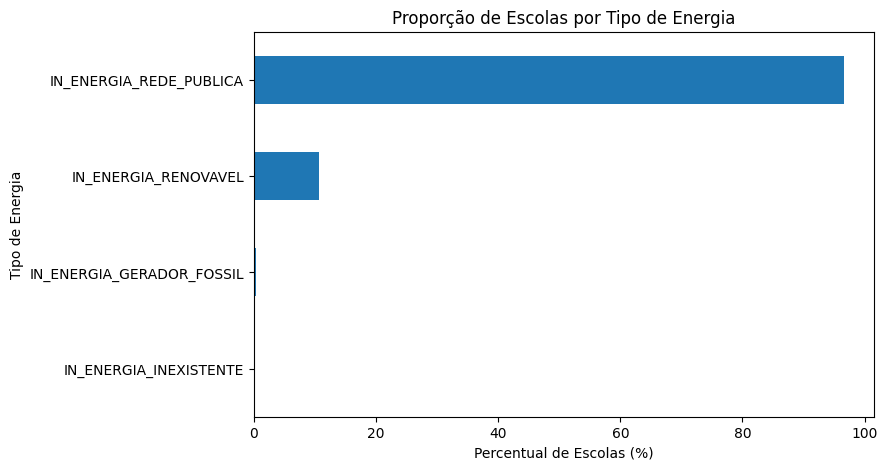

In [72]:
import matplotlib.pyplot as plt

# Calcular percentuais médios
percentuais = df_resumo_energia_priv[colunas_energia].sum() / df_resumo_energia_priv['TOTAL_ESCOLAS'].sum() * 100

percentuais.sort_values().plot(kind='barh', figsize=(8,5))
plt.xlabel('Percentual de Escolas (%)')
plt.ylabel('Tipo de Energia')
plt.title('Proporção de Escolas por Tipo de Energia')
plt.show()


# 2. Mapa com geopandas (regiões com mais escolas sem energia)



In [ ]:
import geopandas as gpd # FAlta instalar essa biblioteca ainda

# Carregar shapefile
mapa_municipios = gpd.read_file("dados/PE_Municipios_2024.shp")

print(mapa_municipios.head())

In [ ]:
# Juntar pelo nome do município
gdf = mapa_municipios.merge(df_resumo_energia, left_on='NM_MUNICIP', right_on='NO_MUNICIPIO')
# gdf = mapa_municipios.merge(df_resumo_energia, on='NO_MUNICIPIO')

# Plotar
gdf.plot(column='IN_ENERGIA_INEXISTENTE', cmap='Reds', legend=True, figsize=(12,8))
plt.title('Número de Escolas sem Energia por Município', fontsize=14)
plt.axis('off')
plt.show()

# 3. Comparação Urbano × Rural (barras agrupadas)

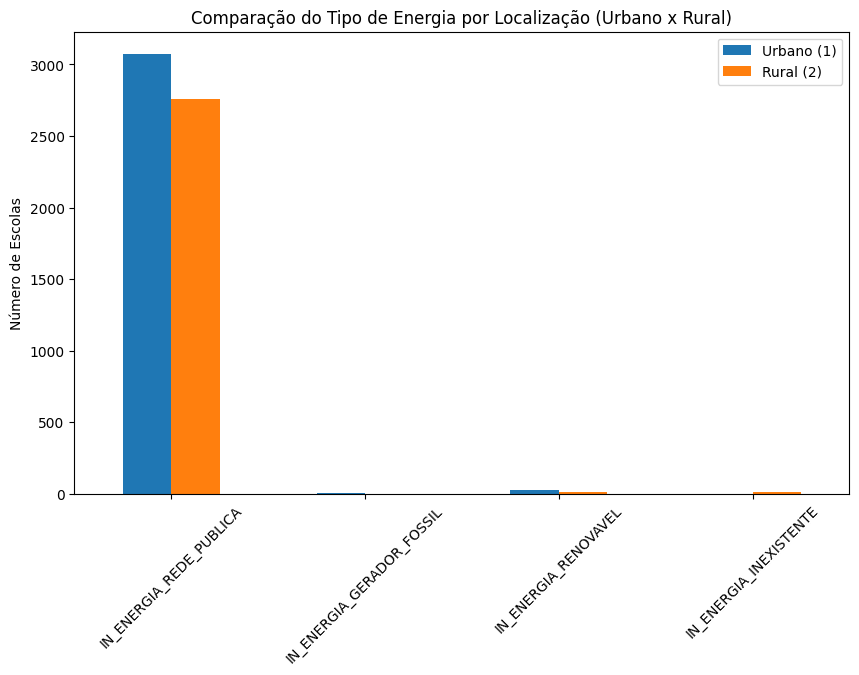

In [74]:
df_localizacao = df_publicas.groupby('TP_LOCALIZACAO')[colunas_energia].sum()

df_localizacao.T.plot(kind='bar', figsize=(10,6))
plt.ylabel('Número de Escolas')
plt.title('Comparação do Tipo de Energia por Localização (Urbano x Rural)')
plt.xticks(rotation=45)
plt.legend(['Urbano (1)', 'Rural (2)'])
plt.show()
